**Part-A**

In [16]:
import numpy as np
import pandas as pd
import os
import re
import pickle
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.pyplot import pie, axis, show

In [17]:
import missingno as msno

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import model_selection
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score
np.random.seed(42)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score

colors = ['#FF5851', '#F3C130', '#414A6B', '#B49A85', '#1C1B20']
sns.color_palette(colors)

[(1.0, 0.34509803921568627, 0.3176470588235294),
 (0.9529411764705882, 0.7568627450980392, 0.18823529411764706),
 (0.2549019607843137, 0.2901960784313726, 0.4196078431372549),
 (0.7058823529411765, 0.6039215686274509, 0.5215686274509804),
 (0.10980392156862745, 0.10588235294117647, 0.12549019607843137)]

**DOMAIN:** *Telecom*


**CONTEXT:** *A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all
relevant customer data and develop focused customer retention programs.*


**DATA DESCRIPTION:** *Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:*


*Customers who left within the last month – the column is called Churn*


*Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and
streaming TV and movies*


*Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges*


*Demographic info about customers – gender, age range, and if they have partners and dependents*


**PROJECT OBJECTIVE:** *To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the
company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention*

**1. Data Understanding & Exploration:**

**A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.**

In [21]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [22]:
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [23]:
df1.shape

(7043, 10)

**B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.**

In [24]:
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [25]:
df2.head()

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes

In [26]:
df2.shape

(7043, 12)

**C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame**

In [27]:
df=pd.merge(df1, df2, on='customerID')

In [28]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
df.shape

(7043, 21)

In [31]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [33]:
df2.columns

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python**

In [34]:
columns1=set(df1.columns.to_list().__add__(df2.columns.to_list()))
columns2=set(df.columns.to_list())
'Columns are identical.' if columns1==columns2 else 'Columns are not identical.'

'Columns are identical.'

**2. Data Cleaning & Analysis:**

**A. Impute missing/unexpected values in the DataFrame.**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum() 

#Since TotalCharges can not be object so we need to convert it to numeric value first.

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [38]:
#We see that there are 11 rows with non-numeric value for the column TotalCharges so let us first drop all these 11 rows
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
df.describe().T

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

**B. Make sure all the variables with continuous values are of ‘Float’ type.**

In [41]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')
print(f'Numerical Columns: {num_cols.columns.tolist()}')
print(f'Categorical Columns: {cat_cols.columns.tolist()}\n')
print('\n\nUnique Values In Categorical columns:')
[f'{col}:   {cat_cols[col].unique()}' for col in cat_cols]

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



Unique Values In Categorical columns:


["customerID:   ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'\n '3186-AJIEK']",
 "gender:   ['Female' 'Male']",
 "Partner:   ['Yes' 'No']",
 "Dependents:   ['No' 'Yes']",
 "PhoneService:   ['No' 'Yes']",
 "MultipleLines:   ['No phone service' 'No' 'Yes']",
 "InternetService:   ['DSL' 'Fiber optic' 'No']",
 "OnlineSecurity:   ['No' 'Yes' 'No internet service']",
 "OnlineBackup:   ['Yes' 'No' 'No internet service']",
 "DeviceProtection:   ['No' 'Yes' 'No internet service']",
 "TechSupport:   ['No' 'Yes' 'No internet service']",
 "StreamingTV:   ['No' 'Yes' 'No internet service']",
 "StreamingMovies:   ['No' 'Yes' 'No internet service']",
 "Contract:   ['Month-to-month' 'One year' 'Two year']",
 "PaperlessBilling:   ['Yes' 'No']",
 "PaymentMethod:   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'\n 'Credit card (automatic)']",
 "Churn:   ['No' 'Yes']"]

In [42]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [43]:
df = df.astype({'SeniorCitizen':'float', 'tenure':'float'})
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
distribution in the pie-chart.**

In [44]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [45]:
def pie_charts_for_CategoricalVar(df_pie,m):
    a = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
    for i in df_pie:
        a.append(i)
    
    b = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
    for i in a:
        if (df[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)

    ncols = m

    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    for n, i in enumerate(b):
        ax = plt.subplot(nrows, ncols, n + 1)
        df.groupby(i).size().plot(kind= 'pie' , autopct='%.2f%%',ax=ax)
    plt.show()

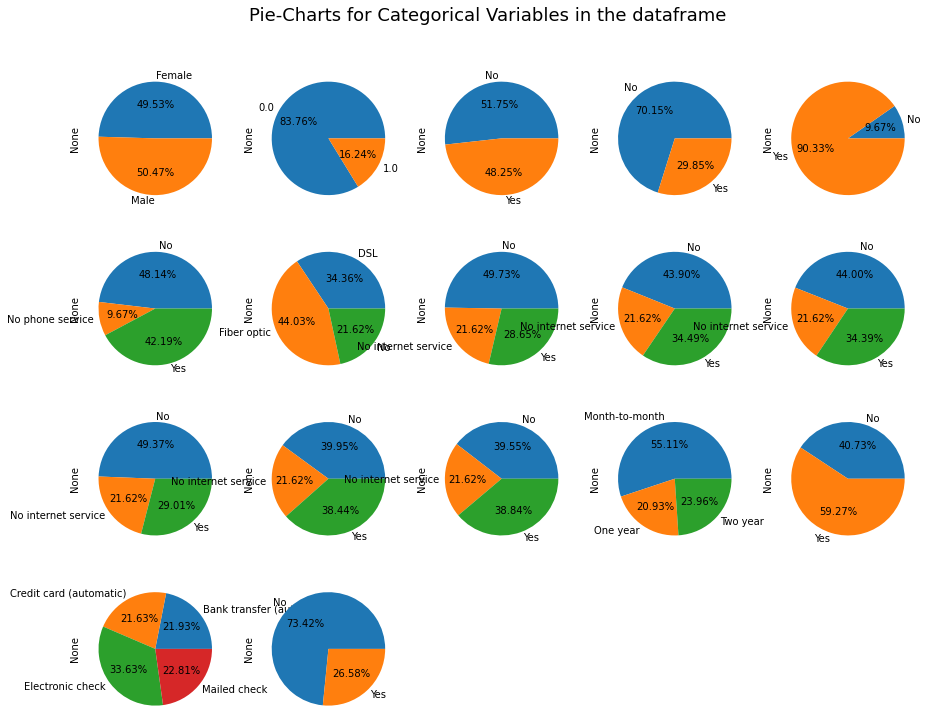

In [46]:
pie_charts_for_CategoricalVar(df,5)

**D. Share insights for Q2.c.**

*Majority of people who don't have partner also are dependents.*

*Very less number of people who don't have partner are dependent.*

*There are fairly equal number of people who have partner are dependent and not dependent.*

*people taking longer contracts are likely to retain for a longer time.*

*People whose payement methods are automatic(Bank transfer, Credit card) have more faith and confidence about the company and are likely to retain for a longer time.*

*People who have partner are more likely to stay longer.*

*Dependent status arguably does not have any strong correlation with tenure.*

**E. Encode all the appropriate Categorical features with the best suitable approach.**

In [47]:
df.drop('customerID', axis=1, inplace=True)

In [48]:
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
srv_corr = []
percent_yes = []
percent_no = []
for i in range(len(services)-1):
    for j in range(i+1, len(services)):
        srv_corr.append(f'{services[i]}-{services[j]}')
        percent_yes.append(cat_cols.loc[(cat_cols[services[i]]=='Yes') & (cat_cols[services[j]]=='Yes')].shape[0]*100/cat_cols.shape[0])
        percent_no.append(cat_cols.loc[(cat_cols[services[i]]=='No') & (cat_cols[services[j]]=='No')].shape[0]*100/cat_cols.shape[0])
        
        
service_corr = pd.DataFrame([srv_corr, percent_yes, percent_no], index=['Service-Service', 'Yes', 'No']).T
service_corr = service_corr.set_index('Service-Service').style.background_gradient(subset=['Yes', 'No'], cmap='bone_r')
service_corr

In [49]:
cat_cols.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [50]:
do_dummy_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
model_df = df.copy()
model_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
model_df['Churn'].replace(to_replace='No',  value=0, inplace=True)
model_df = pd.get_dummies(model_df, columns=do_dummy_cols)
model_df

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0               0.0     1.0           29.85         29.85      0   
1               0.0    34.0           56.95       1889.50      0   
2               0.0     2.0           53.85        108.15      1   
3               0.0    45.0           42.30       1840.75      0   
4               0.0     2.0           70.70        151.65      1   
...             ...     ...             ...           ...    ...   
7038            0.0    24.0           84.80       1990.50      0   
7039            0.0    72.0          103.20       7362.90      0   
7040            0.0    11.0           29.60        346.45      0   
7041            1.0     4.0           74.40        306.60      1   
7042            0.0    66.0          105.65       6844.50      0   

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0                 1            0           0            1              1  ...   
1                 0            1           1            0              1  ...   
2                 0            1           1            0              1  ...   
3                 0            1           1            0              1  ...   
4                 1            0           1            0              1  ...   
...             ...          ...         ...          ...            ...  ...   
7038              0            1           0            1              0  ...   
7039              1            0           0            1              0  ...   
7040              1            0           0            1              0  ...   
7041              0            1           0            1              1  ...   
7042              0            1           1            0              1  ...   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                       0                        1                  0   
1                       0                        0                  1   
2                       0                        1                  0   
3                       0                        0                  1   
4                       0                        1                  0   
...                   ...                      ...                ...   
7038                    1                        0                  1   
7039                    1                        0                  1   
7040                    0                        1                  0   
7041                    0                        1                  0   
7042                    1                        0                  0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                     0                    0                     1   
1                     0                    1                     0   
2                     0                    0                     1   
3                     0                    1                     0   
4                     0                    0                     1   
...                 ...                  ...                   ...   
7038                  0                    0                     1   
7039                  0                    0                     1   
7040                  0                    0                     1   
7041                  0                    0                     1   
7042                  1                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040                                        0   
7041    

In [51]:
model_df

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0               0.0     1.0           29.85         29.85      0   
1               0.0    34.0           56.95       1889.50      0   
2               0.0     2.0           53.85        108.15      1   
3               0.0    45.0           42.30       1840.75      0   
4               0.0     2.0           70.70        151.65      1   
...             ...     ...             ...           ...    ...   
7038            0.0    24.0           84.80       1990.50      0   
7039            0.0    72.0          103.20       7362.90      0   
7040            0.0    11.0           29.60        346.45      0   
7041            1.0     4.0           74.40        306.60      1   
7042            0.0    66.0          105.65       6844.50      0   

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0                 1            0           0            1              1  ...   
1                 0            1           1            0              1  ...   
2                 0            1           1            0              1  ...   
3                 0            1           1            0              1  ...   
4                 1            0           1            0              1  ...   
...             ...          ...         ...          ...            ...  ...   
7038              0            1           0            1              0  ...   
7039              1            0           0            1              0  ...   
7040              1            0           0            1              0  ...   
7041              0            1           0            1              1  ...   
7042              0            1           1            0              1  ...   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                       0                        1                  0   
1                       0                        0                  1   
2                       0                        1                  0   
3                       0                        0                  1   
4                       0                        1                  0   
...                   ...                      ...                ...   
7038                    1                        0                  1   
7039                    1                        0                  1   
7040                    0                        1                  0   
7041                    0                        1                  0   
7042                    1                        0                  0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                     0                    0                     1   
1                     0                    1                     0   
2                     0                    0                     1   
3                     0                    1                     0   
4                     0                    0                     1   
...                 ...                  ...                   ...   
7038                  0                    0                     1   
7039                  0                    0                     1   
7040                  0                    0                     1   
7041                  0                    0                     1   
7042                  1                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                                        0   
7040                                        0   
7041    

In [52]:
model_df.describe().T

count         mean          std  \
SeniorCitizen                            7032.0     0.162400     0.368844   
tenure                                   7032.0    32.421786    24.545260   
MonthlyCharges                           7032.0    64.798208    30.085974   
TotalCharges                             7032.0  2283.300441  2266.771362   
Churn                                    7032.0     0.265785     0.441782   
gender_Female                            7032.0     0.495307     0.500014   
gender_Male                              7032.0     0.504693     0.500014   
Partner_No                               7032.0     0.517491     0.499729   
Partner_Yes                              7032.0     0.482509     0.499729   
Dependents_No                            7032.0     0.701507     0.457629   
Dependents_Yes                           7032.0     0.298493     0.457629   
PhoneService_No                          7032.0     0.096701     0.295571   
PhoneService_Yes                         7032.0     0.903299     0.295571   
MultipleLines_No                         7032.0     0.481371     0.499688   
MultipleLines_No phone service           7032.0     0.096701     0.295571   
MultipleLines_Yes                        7032.0     0.421928     0.493902   
InternetService_DSL                      7032.0     0.343572     0.474934   
InternetService_Fiber optic              7032.0     0.440273     0.496455   
InternetService_No                       7032.0     0.216155     0.411650   
OnlineSecurity_No                        7032.0     0.497298     0.500028   
OnlineSecurity_No internet service       7032.0     0.216155     0.411650   
OnlineSecurity_Yes                       7032.0     0.286547     0.452180   
OnlineBackup_No                          7032.0     0.438993     0.496300   
OnlineBackup_No internet service         7032.0     0.216155     0.411650   
OnlineBackup_Yes                         7032.0     0.344852     0.475354   
DeviceProtection_No                      7032.0     0.439989     0.496421   
DeviceProtection_No internet service     7032.0     0.216155     0.411650   
DeviceProtection_Yes                     7032.0     0.343857     0.475028   
TechSupport_No                           7032.0     0.493743     0.499996   
TechSupport_No internet service          7032.0     0.216155     0.411650   
TechSupport_Yes                          7032.0     0.290102     0.453842   
StreamingTV_No                           7032.0     0.399460     0.489822   
StreamingTV_No internet service          7032.0     0.216155     0.411650   
StreamingTV_Yes                          7032.0     0.384386     0.486484   
StreamingMovies_No                       7032.0     0.395478     0.488988   
StreamingMovies_No internet service      7032.0     0.216155     0.411650   
StreamingMovies_Yes                      7032.0     0.388367     0.487414   
Contract_Month-to-month                  7032.0     0.551052     0.497422   
Contract_One year                        7032.0     0.209329     0.406858   
Contract_Two year                        7032.0     0.239619     0.426881   
PaperlessBilling_No                      7032.0     0.407281     0.491363   
PaperlessBilling_Yes                     7032.0     0.592719     0.491363   
PaymentMethod_Bank transfer (automatic)  7032.0     0.219283     0.413790   
PaymentMethod_Credit card (automatic)    7032.0     0.216297     0.411748   
PaymentMethod_Electronic check           7032.0     0.336320     0.472483   
PaymentMethod_Mailed check               7032.0     0.228100     0.419637   

                                           min       25%       50%        75%  \
SeniorCitizen                             0.00    0.0000     0.000     0.0000   
tenure                                    1.00    9.0000    29.000    55.0000   
MonthlyCharges                           18.25   35.5875    70.350    89.8625   
TotalCharges                             18.80  401.4500  1397.475  3794.7375   
Churn            

In [53]:
model_df.drop(columns=['tenure'], inplace=True)
y = model_df['Churn']
X = model_df.drop(columns=['Churn'])

In [54]:
model_df.describe().T

count         mean          std  \
SeniorCitizen                            7032.0     0.162400     0.368844   
MonthlyCharges                           7032.0    64.798208    30.085974   
TotalCharges                             7032.0  2283.300441  2266.771362   
Churn                                    7032.0     0.265785     0.441782   
gender_Female                            7032.0     0.495307     0.500014   
gender_Male                              7032.0     0.504693     0.500014   
Partner_No                               7032.0     0.517491     0.499729   
Partner_Yes                              7032.0     0.482509     0.499729   
Dependents_No                            7032.0     0.701507     0.457629   
Dependents_Yes                           7032.0     0.298493     0.457629   
PhoneService_No                          7032.0     0.096701     0.295571   
PhoneService_Yes                         7032.0     0.903299     0.295571   
MultipleLines_No                         7032.0     0.481371     0.499688   
MultipleLines_No phone service           7032.0     0.096701     0.295571   
MultipleLines_Yes                        7032.0     0.421928     0.493902   
InternetService_DSL                      7032.0     0.343572     0.474934   
InternetService_Fiber optic              7032.0     0.440273     0.496455   
InternetService_No                       7032.0     0.216155     0.411650   
OnlineSecurity_No                        7032.0     0.497298     0.500028   
OnlineSecurity_No internet service       7032.0     0.216155     0.411650   
OnlineSecurity_Yes                       7032.0     0.286547     0.452180   
OnlineBackup_No                          7032.0     0.438993     0.496300   
OnlineBackup_No internet service         7032.0     0.216155     0.411650   
OnlineBackup_Yes                         7032.0     0.344852     0.475354   
DeviceProtection_No                      7032.0     0.439989     0.496421   
DeviceProtection_No internet service     7032.0     0.216155     0.411650   
DeviceProtection_Yes                     7032.0     0.343857     0.475028   
TechSupport_No                           7032.0     0.493743     0.499996   
TechSupport_No internet service          7032.0     0.216155     0.411650   
TechSupport_Yes                          7032.0     0.290102     0.453842   
StreamingTV_No                           7032.0     0.399460     0.489822   
StreamingTV_No internet service          7032.0     0.216155     0.411650   
StreamingTV_Yes                          7032.0     0.384386     0.486484   
StreamingMovies_No                       7032.0     0.395478     0.488988   
StreamingMovies_No internet service      7032.0     0.216155     0.411650   
StreamingMovies_Yes                      7032.0     0.388367     0.487414   
Contract_Month-to-month                  7032.0     0.551052     0.497422   
Contract_One year                        7032.0     0.209329     0.406858   
Contract_Two year                        7032.0     0.239619     0.426881   
PaperlessBilling_No                      7032.0     0.407281     0.491363   
PaperlessBilling_Yes                     7032.0     0.592719     0.491363   
PaymentMethod_Bank transfer (automatic)  7032.0     0.219283     0.413790   
PaymentMethod_Credit card (automatic)    7032.0     0.216297     0.411748   
PaymentMethod_Electronic check           7032.0     0.336320     0.472483   
PaymentMethod_Mailed check               7032.0     0.228100     0.419637   

                                           min       25%       50%        75%  \
SeniorCitizen                             0.00    0.0000     0.000     0.0000   
MonthlyCharges                           18.25   35.5875    70.350    89.8625   
TotalCharges                             18.80  401.4500  1397.475  3794.7375   
Churn                                     0.00    0.0000     0.000     1.0000   
gender_Female                             0.00    0.0000     0.000     1.0000   
gender_Male  

**F. Split the data into 80% train and 20% test.**

In [55]:
feature_corr = model_df.corr()['Churn'].sort_values(ascending=False)
feature_corr

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Femal

In [56]:
model_df

SeniorCitizen  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0               0.0           29.85         29.85      0              1   
1               0.0           56.95       1889.50      0              0   
2               0.0           53.85        108.15      1              0   
3               0.0           42.30       1840.75      0              0   
4               0.0           70.70        151.65      1              1   
...             ...             ...           ...    ...            ...   
7038            0.0           84.80       1990.50      0              0   
7039            0.0          103.20       7362.90      0              1   
7040            0.0           29.60        346.45      0              1   
7041            1.0           74.40        306.60      1              0   
7042            0.0          105.65       6844.50      0              0   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
0               0           0            1              1               0   
1               1           1            0              1               0   
2               1           1            0              1               0   
3               1           1            0              1               0   
4               0           1            0              1               0   
...           ...         ...          ...            ...             ...   
7038            1           0            1              0               1   
7039            0           0            1              0               1   
7040            0           0            1              0               1   
7041            1           0            1              1               0   
7042            1           1            0              1               0   

      ...  StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0     ...                    0                        1                  0   
1     ...                    0                        0                  1   
2     ...                    0                        1                  0   
3     ...                    0                        0                  1   
4     ...                    0                        1                  0   
...   ...                  ...                      ...                ...   
7038  ...                    1                        0                  1   
7039  ...                    1                        0                  1   
7040  ...                    0                        1                  0   
7041  ...                    0                        1                  0   
7042  ...                    1                        0                  0   

      Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                     0                    0                     1   
1                     0                    1                     0   
2                     0                    0                     1   
3                     0                    1                     0   
4                     0                    0                     1   
...                 ...                  ...                   ...   
7038                  0                    0                     1   
7039                  0                    0                     1   
7040                  0                    0                     1   
7041                  0                    0                     1   
7042                  1                    0                     1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039      

In [57]:
model_df.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

In [58]:
model_df.drop(columns=['tenure'], inplace=True)
y = model_df['Churn']
X = model_df.drop(columns=['Churn'])

KeyError: "['tenure'] not found in axis"

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

**G. Normalize/Standardize the data with the best suitable approach.**

In [61]:
from sklearn.decomposition import PCA

In [62]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [63]:
X_train

array([[-0.43931886,  0.98155578,  1.6599004 , ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       [-0.43931886, -0.97154551, -0.56225219, ..., -0.52489066,
         1.39630196, -0.5394682 ],
       [-0.43931886,  0.83706615,  1.75610395, ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       ...,
       [-0.43931886,  0.92674937,  0.47350714, ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       [-0.43931886,  0.02991714, -0.721544  , ..., -0.52489066,
        -0.71617747,  1.85367739],
       [ 2.27625101,  0.32221802, -0.9787973 , ..., -0.52489066,
         1.39630196, -0.5394682 ]])

**3. Model building and Improvement:**

In [64]:
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [65]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

**A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.**

In [66]:
clf_name = []
roc_auc = []
f1 = []
def model_eval(clf, y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred, labels=y_test.unique())
    disp = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    disp.plot(cmap='cividis')
    m1 = roc_auc_score(y_test, y_pred)
    m2 = f1_score(y_test, y_pred)
    print('ROC_AUC_Score: {:.04f}'.format(m1))
    print('F1 Score: {:.04f}'.format(m2))
    clf_name.append(clf)
    roc_auc.append(m1)
    f1.append(m2)

[16:59:37] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.46      0.79      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.70      0.72      1407

ROC_AUC_Score: 0.7307
F1 Score: 0.5856


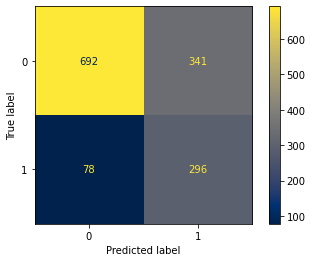

In [67]:
xgb_clf = XGBClassifier(n_estimators=5, max_depth=1, max_leaves=2, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost'
model_eval(clf, y_test, y_pred)

**B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.**

[16:59:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407

ROC_AUC_Score: 0.7526
F1 Score: 0.6192


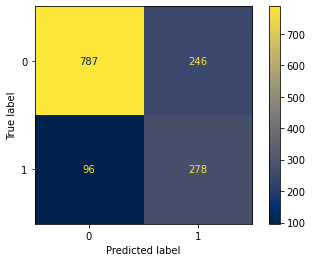

In [68]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=1, max_leaves=2, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost'
model_eval(clf, y_test, y_pred)

**Part-B**

**DOMAIN:** *IT*

**CONTEXT:** *The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts
involved in building workflows for each dataset.*


**PROJECT OBJECTIVE:** *Build a machine learning workflow that will run autonomously with the csv file and return best performing model.*

**STEPS AND TASK:**

**1.** *Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use
1 Dataset from Part 1 (single/merged).*

**2.** *Create separate functions for various purposes.*

**3.** *Various base models should be trained to select the best performing model.*
**4.** *Pickle file should be saved for the best performing model.*

**Include best coding practices in the code:**

*• Modularization*

*• Maintainability*

*• Well commented code etc.*

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score

np.random.seed(42)
colors = ['#FF5851', '#F3C130', '#414A6B', '#B49A85', '#1C1B20']
sns.color_palette(colors)

[(1.0, 0.34509803921568627, 0.3176470588235294),
 (0.9529411764705882, 0.7568627450980392, 0.18823529411764706),
 (0.2549019607843137, 0.2901960784313726, 0.4196078431372549),
 (0.7058823529411765, 0.6039215686274509, 0.5215686274509804),
 (0.10980392156862745, 0.10588235294117647, 0.12549019607843137)]

In [70]:
df = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [71]:
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No  
5               Yes     Fiber optic             No  
6               Yes     Fiber optic             No  
7  No phone service             DSL            Yes  
8               Yes     Fiber optic             No  
9                No             DSL            Yes

In [72]:
df.shape

(7043, 10)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [74]:

df.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
dtype: int64

In [75]:
df.dropna(inplace=True)

In [76]:
model_df.describe().T

count         mean          std  \
SeniorCitizen                            7032.0     0.162400     0.368844   
MonthlyCharges                           7032.0    64.798208    30.085974   
TotalCharges                             7032.0  2283.300441  2266.771362   
Churn                                    7032.0     0.265785     0.441782   
gender_Female                            7032.0     0.495307     0.500014   
gender_Male                              7032.0     0.504693     0.500014   
Partner_No                               7032.0     0.517491     0.499729   
Partner_Yes                              7032.0     0.482509     0.499729   
Dependents_No                            7032.0     0.701507     0.457629   
Dependents_Yes                           7032.0     0.298493     0.457629   
PhoneService_No                          7032.0     0.096701     0.295571   
PhoneService_Yes                         7032.0     0.903299     0.295571   
MultipleLines_No                         7032.0     0.481371     0.499688   
MultipleLines_No phone service           7032.0     0.096701     0.295571   
MultipleLines_Yes                        7032.0     0.421928     0.493902   
InternetService_DSL                      7032.0     0.343572     0.474934   
InternetService_Fiber optic              7032.0     0.440273     0.496455   
InternetService_No                       7032.0     0.216155     0.411650   
OnlineSecurity_No                        7032.0     0.497298     0.500028   
OnlineSecurity_No internet service       7032.0     0.216155     0.411650   
OnlineSecurity_Yes                       7032.0     0.286547     0.452180   
OnlineBackup_No                          7032.0     0.438993     0.496300   
OnlineBackup_No internet service         7032.0     0.216155     0.411650   
OnlineBackup_Yes                         7032.0     0.344852     0.475354   
DeviceProtection_No                      7032.0     0.439989     0.496421   
DeviceProtection_No internet service     7032.0     0.216155     0.411650   
DeviceProtection_Yes                     7032.0     0.343857     0.475028   
TechSupport_No                           7032.0     0.493743     0.499996   
TechSupport_No internet service          7032.0     0.216155     0.411650   
TechSupport_Yes                          7032.0     0.290102     0.453842   
StreamingTV_No                           7032.0     0.399460     0.489822   
StreamingTV_No internet service          7032.0     0.216155     0.411650   
StreamingTV_Yes                          7032.0     0.384386     0.486484   
StreamingMovies_No                       7032.0     0.395478     0.488988   
StreamingMovies_No internet service      7032.0     0.216155     0.411650   
StreamingMovies_Yes                      7032.0     0.388367     0.487414   
Contract_Month-to-month                  7032.0     0.551052     0.497422   
Contract_One year                        7032.0     0.209329     0.406858   
Contract_Two year                        7032.0     0.239619     0.426881   
PaperlessBilling_No                      7032.0     0.407281     0.491363   
PaperlessBilling_Yes                     7032.0     0.592719     0.491363   
PaymentMethod_Bank transfer (automatic)  7032.0     0.219283     0.413790   
PaymentMethod_Credit card (automatic)    7032.0     0.216297     0.411748   
PaymentMethod_Electronic check           7032.0     0.336320     0.472483   
PaymentMethod_Mailed check               7032.0     0.228100     0.419637   

                                           min       25%       50%        75%  \
SeniorCitizen                             0.00    0.0000     0.000     0.0000   
MonthlyCharges                           18.25   35.5875    70.350    89.8625   
TotalCharges                             18.80  401.4500  1397.475  3794.7375   
Churn                                     0.00    0.0000     0.000     1.0000   
gender_Female                             0.00    0.0000     0.000     1.0000   
gender_Male  

In [77]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')
print(f'Numerical Columns: {num_cols.columns.tolist()}')
print(f'Categorical Columns: {cat_cols.columns.tolist()}\n')
print('\n\nUnique Values In Categorical columns:')
[f'{col}:   {cat_cols[col].unique()}' for col in cat_cols]

Numerical Columns: ['SeniorCitizen', 'tenure']
Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']



Unique Values In Categorical columns:


["customerID:   ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'\n '3186-AJIEK']",
 "gender:   ['Female' 'Male']",
 "Partner:   ['Yes' 'No']",
 "Dependents:   ['No' 'Yes']",
 "PhoneService:   ['No' 'Yes']",
 "MultipleLines:   ['No phone service' 'No' 'Yes']",
 "InternetService:   ['DSL' 'Fiber optic' 'No']",
 "OnlineSecurity:   ['No' 'Yes' 'No internet service']"]

**EDA**

In [78]:
df[['gender', 'SeniorCitizen','Partner','Dependents']]

gender  SeniorCitizen Partner Dependents
0     Female              0     Yes         No
1       Male              0      No         No
2       Male              0      No         No
3       Male              0      No         No
4     Female              0      No         No
...      ...            ...     ...        ...
7038    Male              0     Yes        Yes
7039  Female              0     Yes        Yes
7040  Female              0     Yes        Yes
7041    Male              1     Yes         No
7042    Male              0      No         No

[7043 rows x 4 columns]

In [79]:
(cat_cols['gender'].value_counts()*100/cat_cols['gender'].shape[0]).round(2)

Male      50.48
Female    49.52
Name: gender, dtype: float64

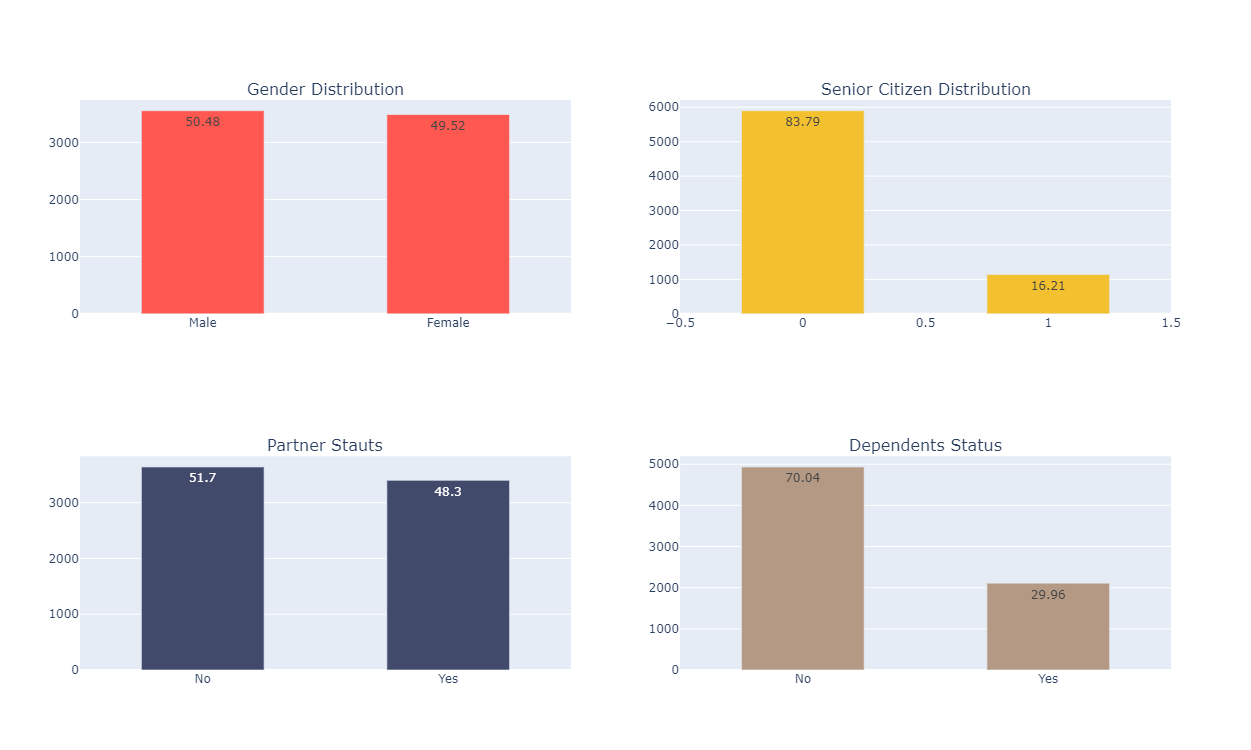

In [80]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['Gender Distribution', 'Senior Citizen Distribution', 'Partner Stauts', 'Dependents Status'])

fig.add_trace(go.Bar(x=cat_cols['gender'].value_counts().index, y=cat_cols['gender'].value_counts(), text=(cat_cols['gender'].value_counts()*100/cat_cols['gender'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[0]}), row=1, col=1)
fig.add_trace(go.Bar(x=num_cols['SeniorCitizen'].value_counts().index, y=num_cols['SeniorCitizen'].value_counts(), text=(num_cols['SeniorCitizen'].value_counts()*100/num_cols['SeniorCitizen'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[1]}), row=1, col=2)
fig.add_trace(go.Bar(x=cat_cols['Partner'].value_counts().index, y=cat_cols['Partner'].value_counts(), text=(cat_cols['Partner'].value_counts()*100/cat_cols['Partner'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[2]}), row=2, col=1)
fig.add_trace(go.Bar(x=cat_cols['Dependents'].value_counts().index, y=cat_cols['Dependents'].value_counts(), text=(cat_cols['Dependents'].value_counts()*100/cat_cols['Dependents'].shape[0]).round(2), width=[0.5, 0.5], marker={'color':colors[3]}), row=2, col=2)
fig.update_layout(height=750, showlegend=False)

In [81]:
c = pd.get_dummies(data = cat_cols[['gender', 'Partner', 'Dependents']], columns=['Dependents']).groupby(['gender', 'Partner']).sum().reset_index()
c

gender Partner  Dependents_No  Dependents_Yes
0  Female      No         1655.0           145.0
1  Female     Yes          805.0           883.0
2    Male      No         1625.0           216.0
3    Male     Yes          848.0           866.0

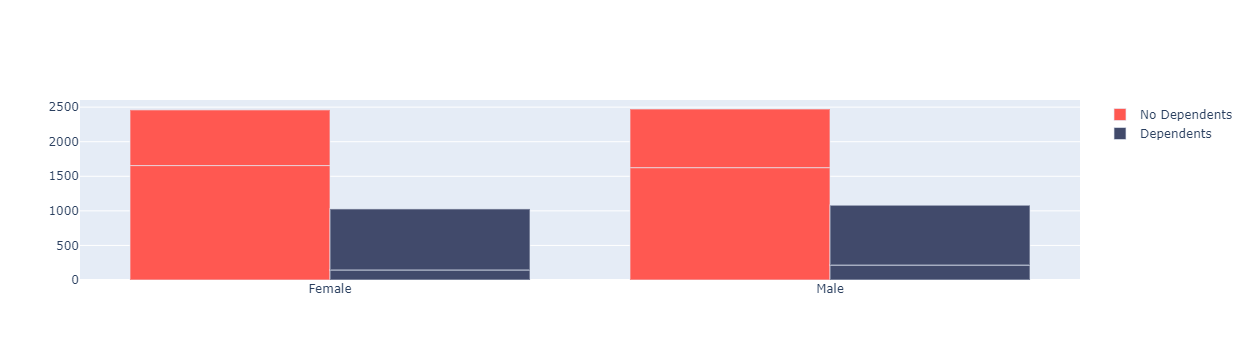

In [82]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=c['gender'],
    y=c['Dependents_No'],
    name='No Dependents',
    hovertext=["Partner: No", "Partner: Yes", "Partner: No", "Partner: Yes"],
    marker_color=colors[0]
))
fig.add_trace(go.Bar(
    x=c['gender'],
    y=c['Dependents_Yes'],
    name='Dependents',
    hovertext=["Partner: No", "Partner: Yes", "Partner: No", "Partner: Yes"],
    marker_color=colors[2]
))

In [83]:
cat_cols.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity'],
      dtype='object')

In [84]:
do_dummy_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity']
model_df = df.copy()
model_df['OnlineSecurity'].replace(to_replace='Yes', value=1, inplace=True)
model_df['OnlineSecurity'].replace(to_replace='No',  value=0, inplace=True)
model_df = pd.get_dummies(model_df, columns=do_dummy_cols)
model_df

customerID  SeniorCitizen  tenure  gender_Female  gender_Male  \
0     7590-VHVEG              0       1              1            0   
1     5575-GNVDE              0      34              0            1   
2     3668-QPYBK              0       2              0            1   
3     7795-CFOCW              0      45              0            1   
4     9237-HQITU              0       2              1            0   
...          ...            ...     ...            ...          ...   
7038  6840-RESVB              0      24              0            1   
7039  2234-XADUH              0      72              1            0   
7040  4801-JZAZL              0      11              1            0   
7041  8361-LTMKD              1       4              0            1   
7042  3186-AJIEK              0      66              0            1   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0              0            1              1               0                1   
1              1            0              1               0                0   
2              1            0              1               0                0   
3              1            0              1               0                1   
4              1            0              1               0                0   
...          ...          ...            ...             ...              ...   
7038           0            1              0               1                0   
7039           0            1              0               1                0   
7040           0            1              0               1                1   
7041           0            1              1               0                0   
7042           1            0              1               0                0   

      PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  \
0                    0                 0                               1   
1                    1                 1                               0   
2                    1                 1                               0   
3                    0                 0                               1   
4                    1                 1                               0   
...                ...               ...                             ...   
7038                 1                 0                               0   
7039                 1                 0                               0   
7040                 0                 0                               1   
7041                 1                 0                               0   
7042                 1                 1                               0   

      MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
0                     0                    1                            0   
1                     0                    1                            0   
2                     0                    1                            0   
3                     0                    1                            0   
4                     0                    0                            1   
...                 ...                  ...                          ...   
7038                  1                    1                            0   
7039                  1                    0                            1   
7040                  0                    1                            0   
7041                  1                    0                            1   
7042                  0                    0                            1   

      InternetService_No  OnlineSecurity_0  OnlineSecurity_1  \
0                      0                 1                 0   
1                      0                 0                 1   
2                      0                 0                 1   
3                      0                 0                 1   
4                     

In [85]:
model_df.describe().T

count       mean        std  min  25%  \
SeniorCitizen                       7043.0   0.162147   0.368612  0.0  0.0   
tenure                              7043.0  32.371149  24.559481  0.0  9.0   
gender_Female                       7043.0   0.495244   0.500013  0.0  0.0   
gender_Male                         7043.0   0.504756   0.500013  0.0  0.0   
Partner_No                          7043.0   0.516967   0.499748  0.0  0.0   
Partner_Yes                         7043.0   0.483033   0.499748  0.0  0.0   
Dependents_No                       7043.0   0.700412   0.458110  0.0  0.0   
Dependents_Yes                      7043.0   0.299588   0.458110  0.0  0.0   
PhoneService_No                     7043.0   0.096834   0.295752  0.0  0.0   
PhoneService_Yes                    7043.0   0.903166   0.295752  0.0  1.0   
MultipleLines_No                    7043.0   0.481329   0.499687  0.0  0.0   
MultipleLines_No phone service      7043.0   0.096834   0.295752  0.0  0.0   
MultipleLines_Yes                   7043.0   0.421837   0.493888  0.0  0.0   
InternetService_DSL                 7043.0   0.343746   0.474991  0.0  0.0   
InternetService_Fiber optic         7043.0   0.439585   0.496372  0.0  0.0   
InternetService_No                  7043.0   0.216669   0.412004  0.0  0.0   
OnlineSecurity_0                    7043.0   0.496663   0.500024  0.0  0.0   
OnlineSecurity_1                    7043.0   0.286668   0.452237  0.0  0.0   
OnlineSecurity_No internet service  7043.0   0.216669   0.412004  0.0  0.0   

                                     50%   75%   max  
SeniorCitizen                        0.0   0.0   1.0  
tenure                              29.0  55.0  72.0  
gender_Female                        0.0   1.0   1.0  
gender_Male                          1.0   1.0   1.0  
Partner_No                           1.0   1.0   1.0  
Partner_Yes                          0.0   1.0   1.0  
Dependents_No                        1.0   1.0   1.0  
Dependents_Yes                       0.0   1.0   1.0  
PhoneService_No                      0.0   0.0   1.0  
PhoneService_Yes                     1.0   1.0   1.0  
MultipleLines_No                     0.0   1.0   1.0  
MultipleLines_No phone service       0.0   0.0   1.0  
MultipleLines_Yes                    0.0   1.0   1.0  
InternetService_DSL                  0.0   1.0   1.0  
InternetService_Fiber optic          0.0   1.0   1.0  
InternetService_No                   0.0   0.0   1.0  
OnlineSecurity_0                     0.0   1.0   1.0  
OnlineSecurity_1                     0.0   1.0   1.0  
OnlineSecurity_No internet service   0.0   0.0   1.0

<AxesSubplot:>

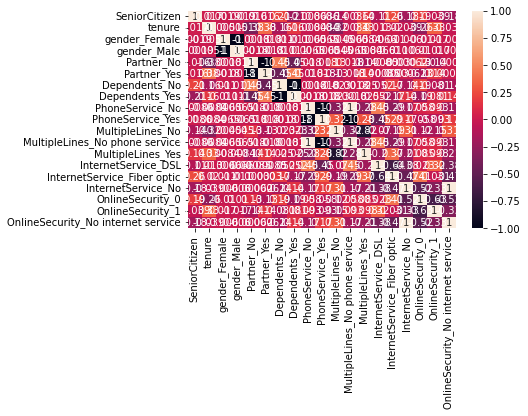

In [86]:
sns.heatmap(model_df.corr(),annot=True)

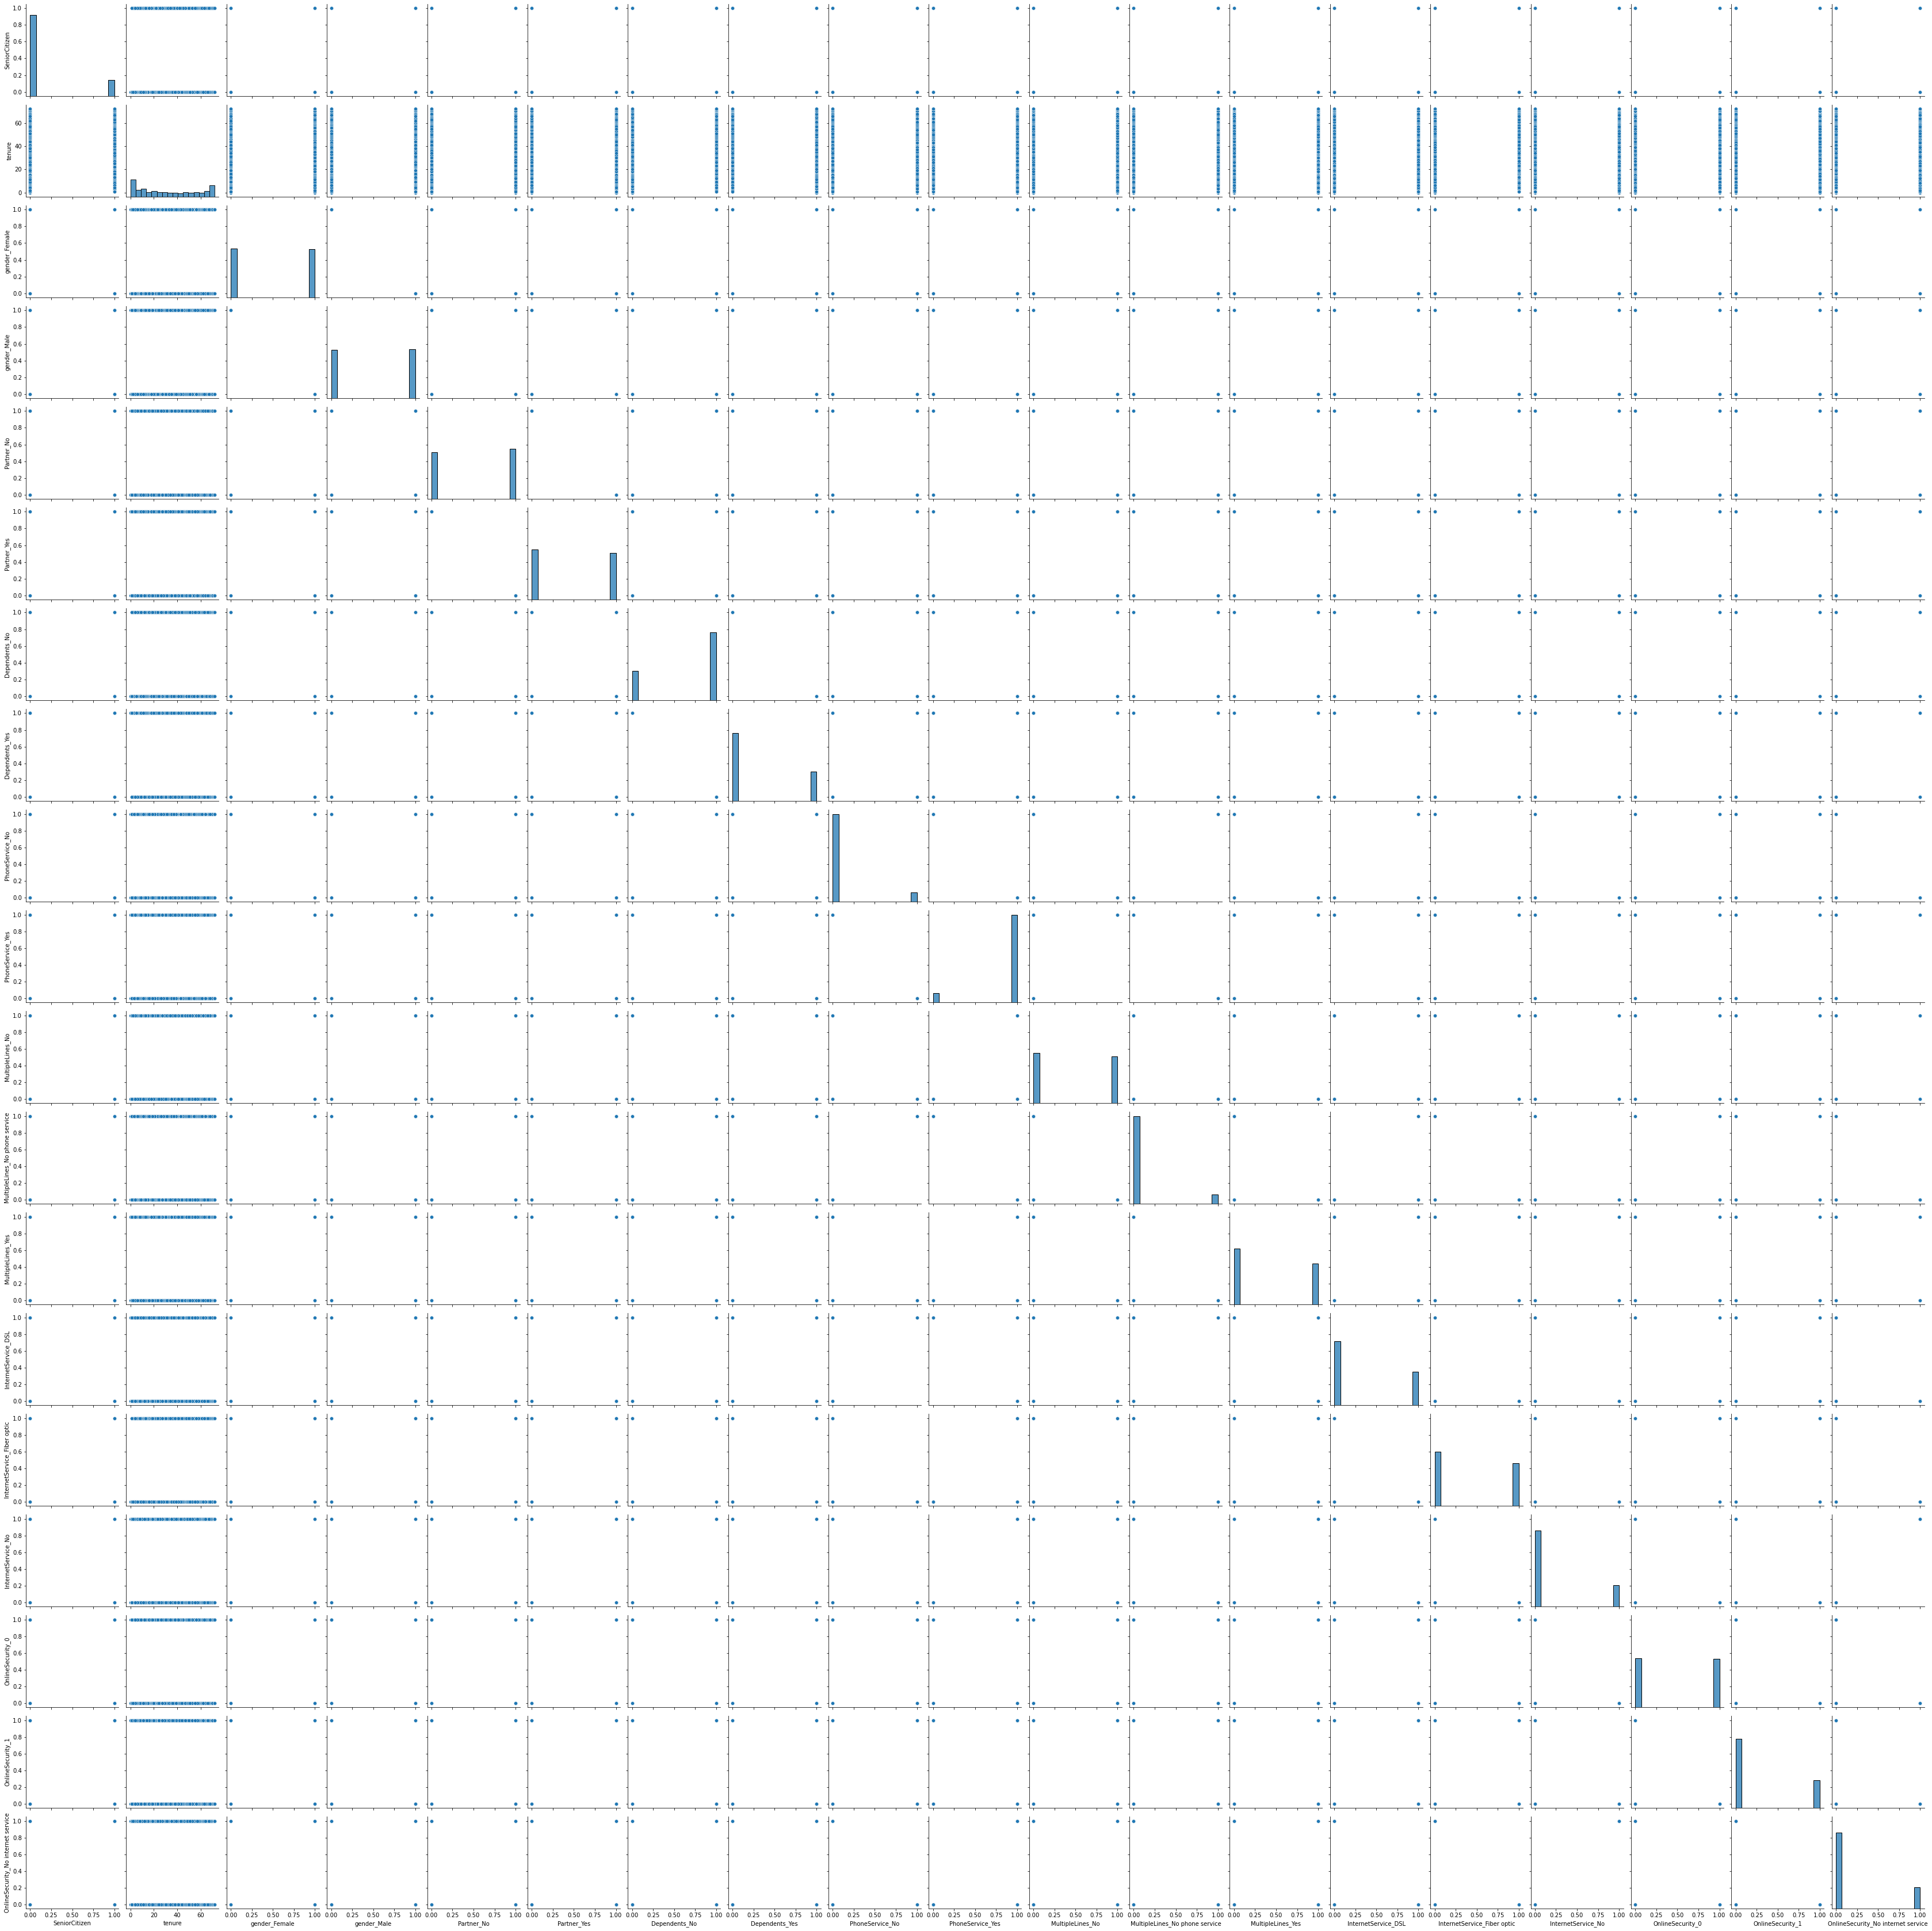

In [88]:
sns.pairplot(model_df)

In [89]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=10)
SVM_model=SVC()

LR: 0.798208 (0.010881)
KNN: 0.783278 (0.011606)
SVC: 0.734215 (0.012067)


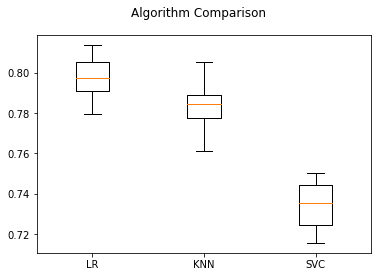

In [90]:
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('SVC', SVM_model))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [91]:
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=10)
SVM_model=SVC()

LR: 0.799345 (0.012071)
KNN: 0.784700 (0.009902)
SVC: 0.734215 (0.000428)


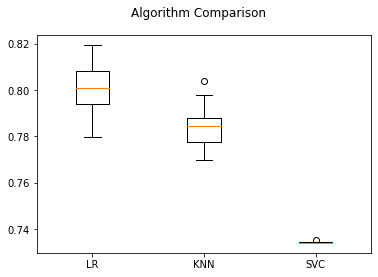

In [92]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,  X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [94]:
KNN = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' )

In [95]:
KNN.fit(X_train, y_train)
predicted_labels = KNN.predict(X_test)

In [96]:
print('Accuracy on Training data:',KNN.score(X_train, y_train) )
print('Accuracy on Test data:',KNN.score(X_test, y_test) )

Accuracy on Training data: 0.8298666666666666
Accuracy on Test data: 0.7690120824449183


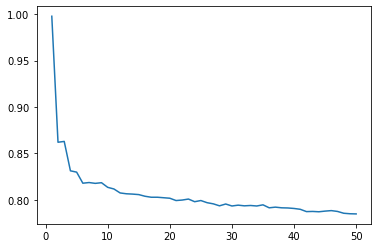

In [97]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))
plt.plot(range(1,51),train_score)
plt.show()

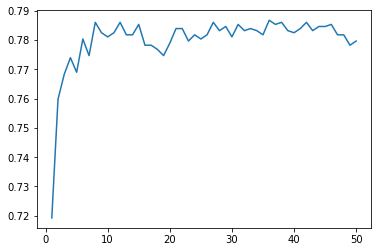

In [98]:
plt.plot(range(1,51),test_score)
plt.show()

In [99]:
k=[1,3,5,7,9,11,13,15,17,19]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean' ) #Building knn with 5 neighbors
    KNN.fit(X_train, y_train)
    predicted_labels = KNN.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,KNN.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,KNN.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

Accuracy on Training data for k 1 is 0.9976888888888888:
Accuracy on Test data for k 1 is 0.7192608386638237:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1041
           1       0.46      0.48      0.47       366

    accuracy                           0.72      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.72      0.72      1407

Accuracy on Training data for k 3 is 0.8629333333333333:
Accuracy on Test data for k 3 is 0.7683013503909026:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1041
           1       0.56      0.49      0.52       366

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407

Accuracy on Training data for k 5 is 0.8298666666666666:
Accuracy on Test da

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [103]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [104]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [105]:
X_train

array([[-0.43931886,  0.98155578,  1.6599004 , ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       [-0.43931886, -0.97154551, -0.56225219, ..., -0.52489066,
         1.39630196, -0.5394682 ],
       [-0.43931886,  0.83706615,  1.75610395, ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       ...,
       [-0.43931886,  0.92674937,  0.47350714, ...,  1.90515869,
        -0.71617747, -0.5394682 ],
       [-0.43931886,  0.02991714, -0.721544  , ..., -0.52489066,
        -0.71617747,  1.85367739],
       [ 2.27625101,  0.32221802, -0.9787973 , ..., -0.52489066,
         1.39630196, -0.5394682 ]])

In [106]:
smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [107]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [108]:
clf_name = []
roc_auc = []
f1 = []
def model_eval(clf, y_test, y_pred):
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred, labels=y_test.unique())
    disp = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    disp.plot(cmap='cividis')
    m1 = roc_auc_score(y_test, y_pred)
    m2 = f1_score(y_test, y_pred)
    print('ROC_AUC_Score: {:.04f}'.format(m1))
    print('F1 Score: {:.04f}'.format(m2))
    clf_name.append(clf)
    roc_auc.append(m1)
    f1.append(m2)

oob score:  0.8049636803874092
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.78      1407

ROC_AUC_Score: 0.7622
F1 Score: 0.6310


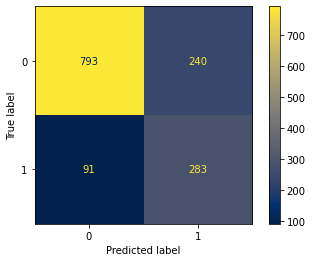

In [109]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=300, bootstrap=True,oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('oob score: ', bag_clf.oob_score_)
clf = 'Bagging'
model_eval(clf, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1033
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

ROC_AUC_Score: 0.7638
F1 Score: 0.6320


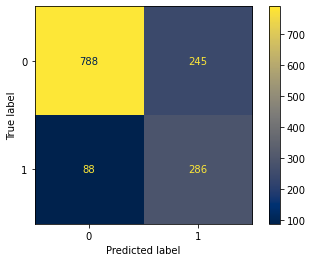

In [110]:
pas_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=300, bootstrap=False, n_jobs=-1, random_state=42)
pas_clf.fit(X_train, y_train)
y_pred = pas_clf.predict(X_test)
clf = 'Pasting'
model_eval(clf, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.78      1407

ROC_AUC_Score: 0.7207
F1 Score: 0.5881


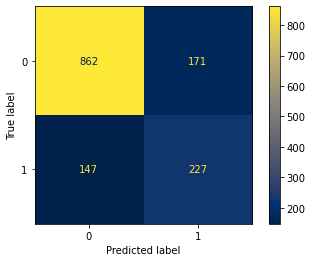

In [111]:
rs_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_features=20, bootstrap_features=True, n_jobs=-1, random_state=42)
rs_clf.fit(X_train, y_train)
y_pred = rs_clf.predict(X_test)
clf = 'Random Subspace'
model_eval(clf, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1033
           1       0.54      0.76      0.63       374

    accuracy                           0.76      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.76      0.77      1407

ROC_AUC_Score: 0.7638
F1 Score: 0.6320


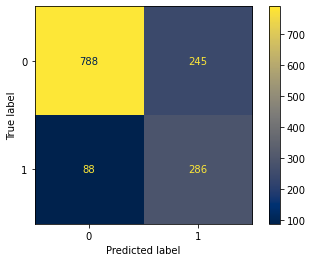

In [112]:
rp_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=500, max_features=10, bootstrap=True, bootstrap_features=False, n_jobs=-1, random_state=42)
rp_clf.fit(X_train, y_train)
y_pred = pas_clf.predict(X_test)
clf = 'Random Patches'
model_eval(clf, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1033
           1       0.54      0.73      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.77      1407

ROC_AUC_Score: 0.7533
F1 Score: 0.6224


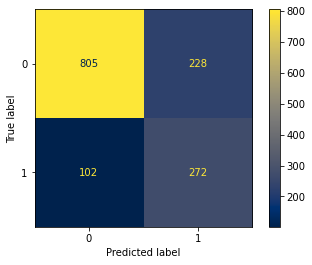

In [113]:
rf_clf = RandomForestClassifier(n_estimators=500, max_samples=400, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
clf = 'Random Forest'
model_eval(clf, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.51      0.74      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.76      1407

ROC_AUC_Score: 0.7418
F1 Score: 0.6051


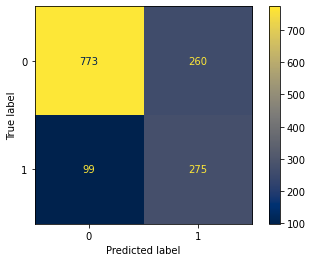

In [114]:
etc_clf = ExtraTreesClassifier(n_estimators=1000, min_samples_split=300, random_state=42)
etc_clf.fit(X_train, y_train)
y_pred = etc_clf.predict(X_test)
clf = 'Extra Trees'
model_eval(clf, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.79      0.84      1033
           1       0.55      0.71      0.62       374

    accuracy                           0.77      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.80      0.77      0.78      1407

ROC_AUC_Score: 0.7529
F1 Score: 0.6238


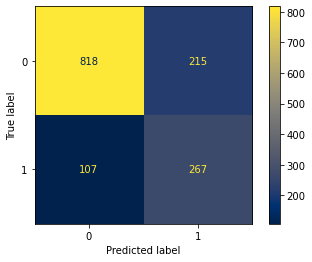

In [115]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=300, learning_rate=1.0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
clf = 'Adaboost'
model_eval(clf, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1033
           1       0.59      0.71      0.64       374

    accuracy                           0.79      1407
   macro avg       0.74      0.76      0.75      1407
weighted avg       0.81      0.79      0.80      1407

ROC_AUC_Score: 0.7639
F1 Score: 0.6423


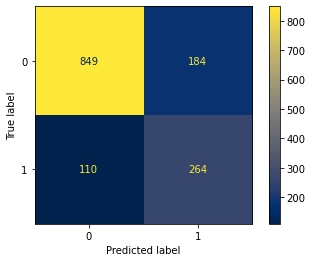

In [116]:
gbdt_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=20, max_leaf_nodes=2, random_state=42)
gbdt_clf.fit(X_train, y_train)
y_pred = gbdt_clf.predict(X_test)
clf = 'Gradient Boosting'
model_eval(clf, y_test, y_pred)

[17:21:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.53      0.74      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407

ROC_AUC_Score: 0.7526
F1 Score: 0.6192


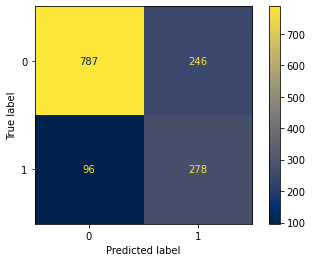

In [117]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=1, max_leaves=2, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost'
model_eval(clf, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1033
           1       0.58      0.70      0.63       374

    accuracy                           0.78      1407
   macro avg       0.73      0.76      0.74      1407
weighted avg       0.80      0.78      0.79      1407

ROC_AUC_Score: 0.7551
F1 Score: 0.6303


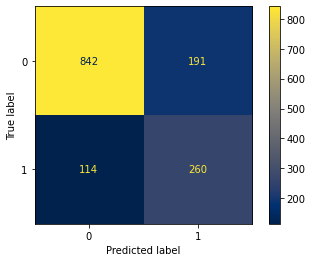

In [118]:
lgbm_clf = LGBMClassifier(n_estimators=7000, max_depth=2, num_leaves=2, random_state=42)
lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)
clf = 'LightGBM'
model_eval(clf, y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.58      0.63      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407

ROC_AUC_Score: 0.7318
F1 Score: 0.6028


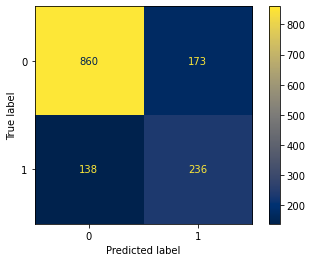

In [119]:
cat_clf = CatBoostClassifier(n_estimators=500, max_depth=4, random_state=42, verbose=0)
cat_clf.fit(X_train, y_train)
y_pred = cat_clf.predict(X_test)
clf = 'CatBoost'
model_eval(clf, y_test, y_pred)

[17:22:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.7525870860532895
XGBClassifier 0.6191536748329622
LGBMClassifier 0.7551444057337798
LGBMClassifier 0.6303030303030304
CatBoostClassifier 0.731771332135776
CatBoostClassifier 0.6028097062579821
[17:22:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.7521250601798406

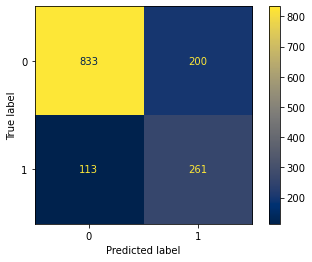

In [120]:
voting_clf = VotingClassifier(
estimators=[('xgb', xgb_clf), ('lgbm', lgbm_clf), ('cat', cat_clf)],
voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
for clf in (xgb_clf, lgbm_clf, cat_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))
    print(clf.__class__.__name__, f1_score(y_test, y_pred))
    
clf = 'Voting Classifier'
model_eval(clf, y_test, y_pred)

[17:23:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

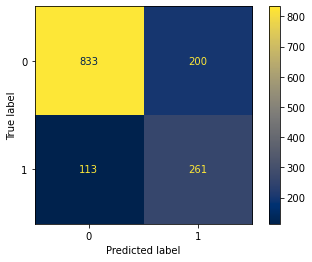

In [121]:
stack_clf = StackingClassifier(estimators = [('bag', bag_clf),
                                             ('pas', pas_clf),
                                             ('rs', rs_clf),
                                             ('rp', rp_clf),                                             
                                             ('rf', rf_clf),
                                             ('etc', etc_clf),
                                             ('ada', ada_clf),
                                             ('gbdt', gbdt_clf),
                                             ('xgb',xgb_clf),
                                             ('lgbm',lgbm_clf),
                                             ('cat',cat_clf)],
                           final_estimator = rf_clf)

stack_clf.fit(X_train, y_train)
stack_clf.predict(X_test)
clf = 'Stack'
model_eval(clf, y_test, y_pred)

In [122]:
d = {'Classifier': clf_name, 'ROC_AUC_Score':roc_auc, 'F1_Score':f1}
clf_report = pd.DataFrame(data=d).set_index('Classifier').sort_values('F1_Score', ascending=False)
clf_report

ROC_AUC_Score  F1_Score
Classifier                                
Gradient Boosting       0.763880  0.642336
Pasting                 0.763766  0.632044
Random Patches          0.763766  0.632044
Bagging                 0.762176  0.630992
LightGBM                0.755144  0.630303
Voting Classifier       0.752125  0.625150
Stack                   0.752125  0.625150
Adaboost                0.752886  0.623832
Random Forest           0.753278  0.622426
XGBoost                 0.752587  0.619154
Extra Trees             0.741800  0.605061
CatBoost                0.731771  0.602810
Random Subspace         0.720707  0.588083

In [125]:
xgb_r = XGBRegressor(n_estimators=1000, random_state=42)
xgb_r.fit(X_train,y_train)
y_pred = xgb_r.predict(X_test)

In [126]:
print(f'R Squared Score: {r2_score(y_pred, y_test)}')

R Squared Score: -0.5021762989922274
